<a href="https://colab.research.google.com/github/Achooch/Supervised--diabetes-publix/blob/master/Supervised_Diabetes_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised learning regression probability array as result in test function 







In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [ ]:
df.shape

(768, 9)

In [ ]:
#check and remove duplicates
df.drop_duplicates(inplace = True)
df.shape

(768, 9)

In [ ]:
#display number of missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#convert data to array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
#get all rows for inputs (X = first 8 rows, y = last row)
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
#preprocess the data (scale)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
#split the data train-val-test (test size = split %)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 4)

In [ ]:
#build the model
model = Sequential([
    Dense(12, activation = 'relu', input_shape = (8,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
]
)

In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#train the model
hist = model.fit(X_train, y_train, batch_size=64, epochs= 1000, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 172us/step - loss: 0.6945 - accuracy: 0.4420 - val_loss: 0.6905 - val_accuracy: 0.5854
Epoch 2/1000
491/491 [==============================] - 0s 40us/step - loss: 0.6880 - accuracy: 0.6415 - val_loss: 0.6844 - val_accuracy: 0.6667
Epoch 3/1000
491/491 [==============================] - 0s 30us/step - loss: 0.6827 - accuracy: 0.6619 - val_loss: 0.6792 - val_accuracy: 0.6748
Epoch 4/1000
491/491 [==============================] - 0s 27us/step - loss: 0.6781 - accuracy: 0.6456 - val_loss: 0.6748 - val_accuracy: 0.6585
Epoch 5/1000
491/491 [==============================] - 0s 27us/step - loss: 0.6743 - accuracy: 0.6456 - val_loss: 0.6712 - val_accuracy: 0.6585
Epoch 6/1000
491/491 [==============================] - 0s 28us/step - loss: 0.6713 - accuracy: 0.6497 - val_loss: 0.6679 - val_accuracy: 0.6504
Epoch 7/1000
491/491 [==============================] - 0s 27us/step - loss: 0.6683

<function matplotlib.pyplot.show>

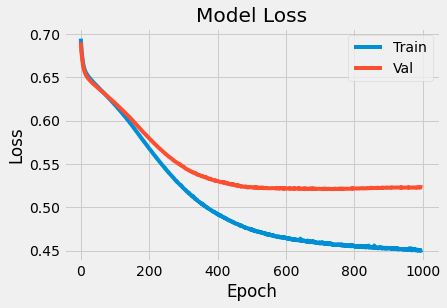

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show

<function matplotlib.pyplot.show>

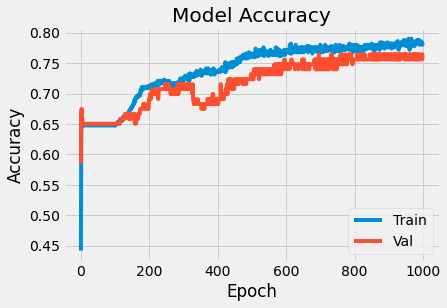

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show

In [ ]:
#make a prediction
prediction = model.predict(X_test)
prediction = [1 if y >= 0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [ ]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_train)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('confusion_matrix: \n', confusion_matrix(y_train,pred))
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       398
         1.0       0.73      0.60      0.66       216

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.77       614

confusion_matrix: 
 [[349  49]
 [ 86 130]]
Accuracy:  0.7801302931596091


In [ ]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('confusion_matrix: \n', confusion_matrix(y_test,pred))
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       102
         1.0       0.67      0.67      0.67        52

    accuracy                           0.78       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

confusion_matrix: 
 [[85 17]
 [17 35]]
Accuracy:  0.7792207792207793
